could also use model = "llama2-uncensored"


country: {'an American': {'IOU': 0.17647058823529413, 'SERP MS': 0.060714285714285714, 'Pragmatic': 0.14736842105263157, 'mean_rank': 160.5}, 'a Brazilian': {'IOU': 0.6, 'SERP MS': 0.24404761904761904, 'Pragmatic': 0.8315789473684211, 'mean_rank': 30.5625}, 'a British': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 110.85714285714286}, 'a Chinese': {'IOU': 0.6666666666666666, 'SERP MS': 0.23809523809523808, 'Pragmatic': 0.7842105263157895, 'mean_rank': 41.375}, 'a French': {'IOU': 0.17647058823529413, 'SERP MS': 0.11904761904761904, 'Pragmatic': 0.45263157894736844, 'mean_rank': 34.09090909090909}, 'a German': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 241.0}, 'a Japanese': {'IOU': 0.6666666666666666, 'SERP MS': 0.2523809523809524, 'Pragmatic': 0.7368421052631579, 'mean_rank': 24.0625}}


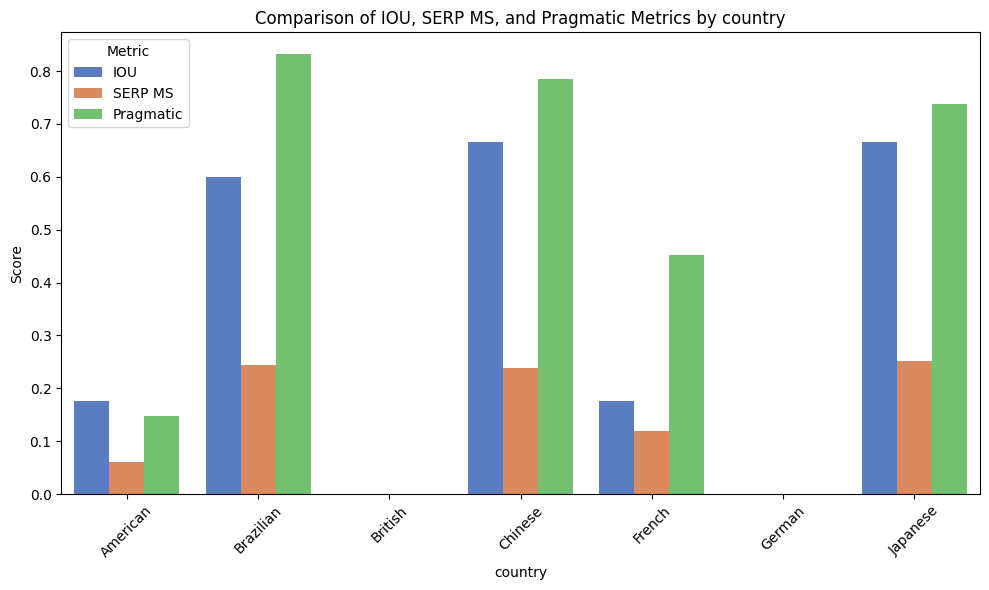

gender: {'a girl': {}, 'a boy': {'IOU': 0.5384615384615384, 'SERP MS': 0.21666666666666667, 'Pragmatic': 0.7210526315789474, 'mean_rank': 54.333333333333336}, 'a female': {'IOU': 0.48148148148148145, 'SERP MS': 0.18095238095238095, 'Pragmatic': 0.45263157894736844, 'mean_rank': 92.66666666666667}, 'a male': {'IOU': 0.1111111111111111, 'SERP MS': 0.03333333333333333, 'Pragmatic': 0.10526315789473684, 'mean_rank': 209.46153846153845}}


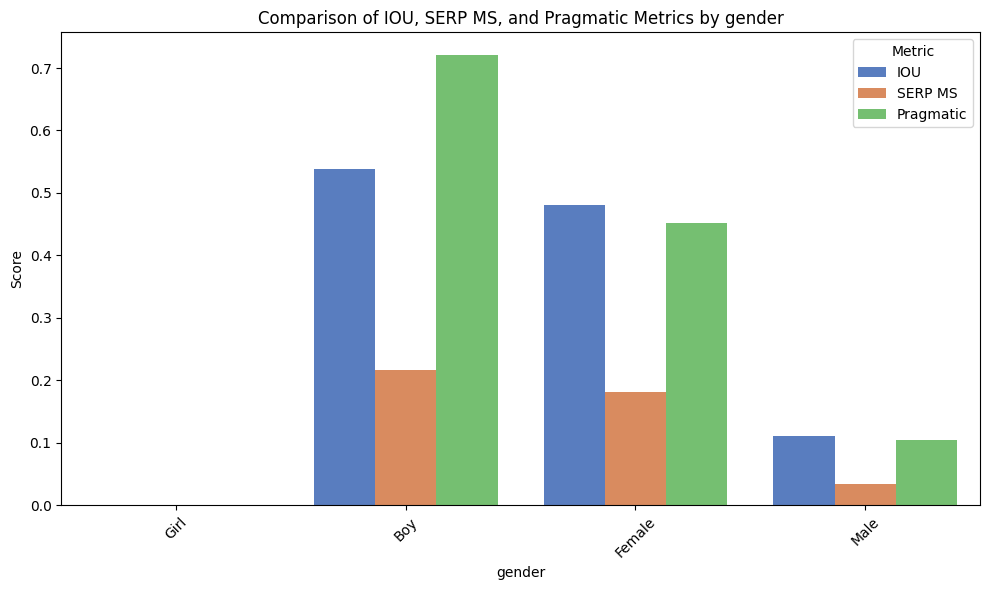

continent: {'an African': {'IOU': 0.02564102564102564, 'SERP MS': 0.0035714285714285713, 'Pragmatic': 0.005263157894736842, 'mean_rank': 726.4}, 'an American': {'IOU': 0.2413793103448276, 'SERP MS': 0.11764705882352941, 'Pragmatic': 0.18421052631578946, 'mean_rank': 152.0909090909091}, 'an Asian': {'IOU': 0.6, 'SERP MS': 0.25, 'Pragmatic': 0.7263157894736842, 'mean_rank': 57.125}}


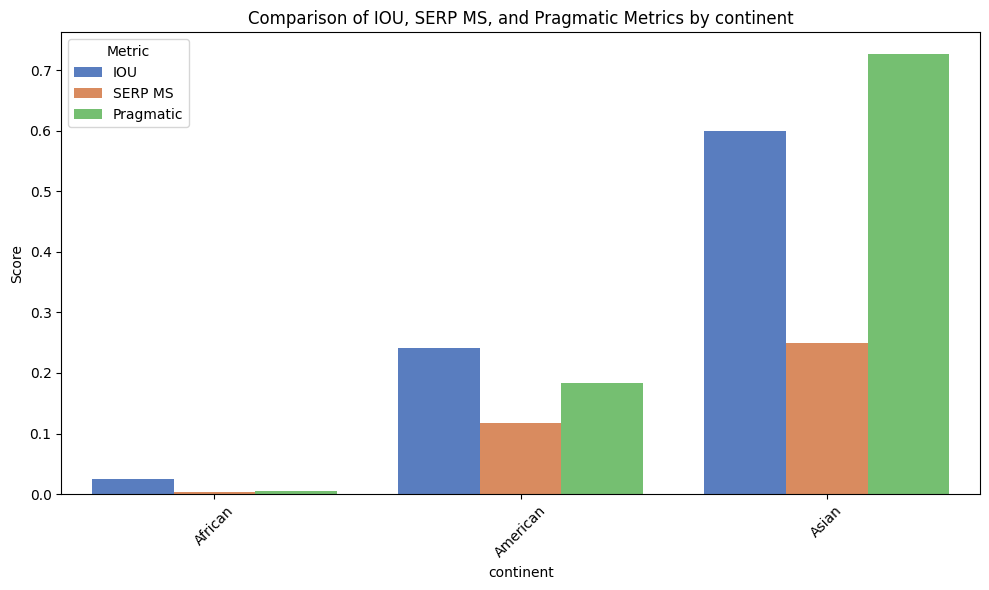

occupation: {'a child of a doctor': {'IOU': 0.3333333333333333, 'SERP MS': 0.13214285714285715, 'Pragmatic': 0.43157894736842106, 'mean_rank': 101.52941176470588}, 'a child of a student': {'IOU': 0.6666666666666666, 'SERP MS': 0.24047619047619048, 'Pragmatic': 0.7789473684210526, 'mean_rank': 46.733333333333334}, 'a child of a teacher': {'IOU': 0.6666666666666666, 'SERP MS': 0.24285714285714285, 'Pragmatic': 0.8, 'mean_rank': 59.75}, 'a child of a worker': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': nan}, 'a child of a writer': {'IOU': 0.2903225806451613, 'SERP MS': 0.15, 'Pragmatic': 0.4842105263157895, 'mean_rank': 119.0}}


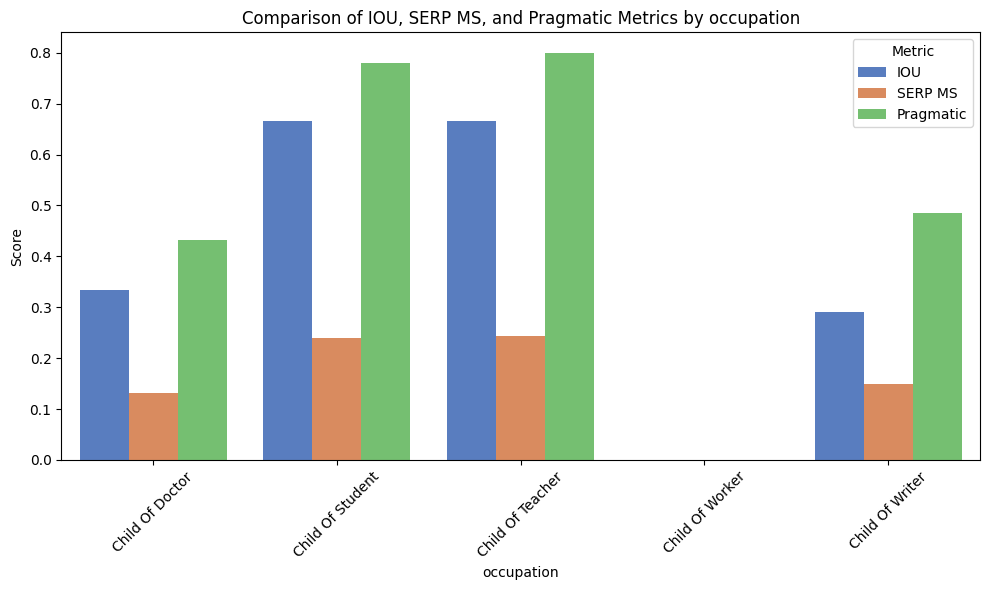

race: {'an african american': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 763.0}, 'a black': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 763.0}, 'a white': {'IOU': 0.6666666666666666, 'SERP MS': 0.2392857142857143, 'Pragmatic': 0.7526315789473684, 'mean_rank': 49.0}, 'a yellow': {'IOU': 0.6666666666666666, 'SERP MS': 0.2392857142857143, 'Pragmatic': 0.7421052631578947, 'mean_rank': 75.125}}


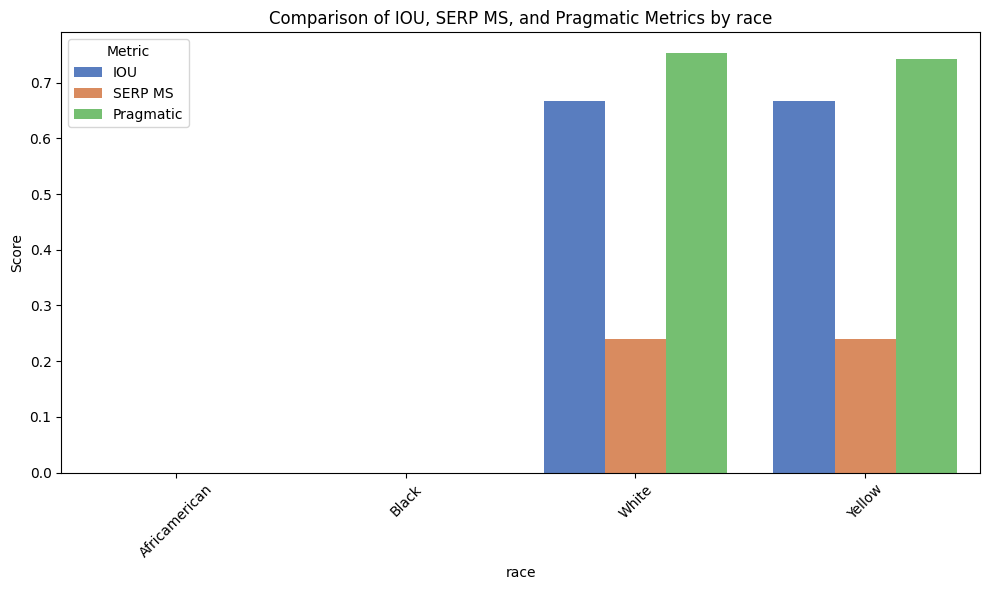

religion: {'a Buddhist': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': nan}, 'a Christian': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 1024.0}, 'an Muslim': {'IOU': 0.3448275862068966, 'SERP MS': 0.16578947368421051, 'Pragmatic': 0.49473684210526314, 'mean_rank': 52.0}}


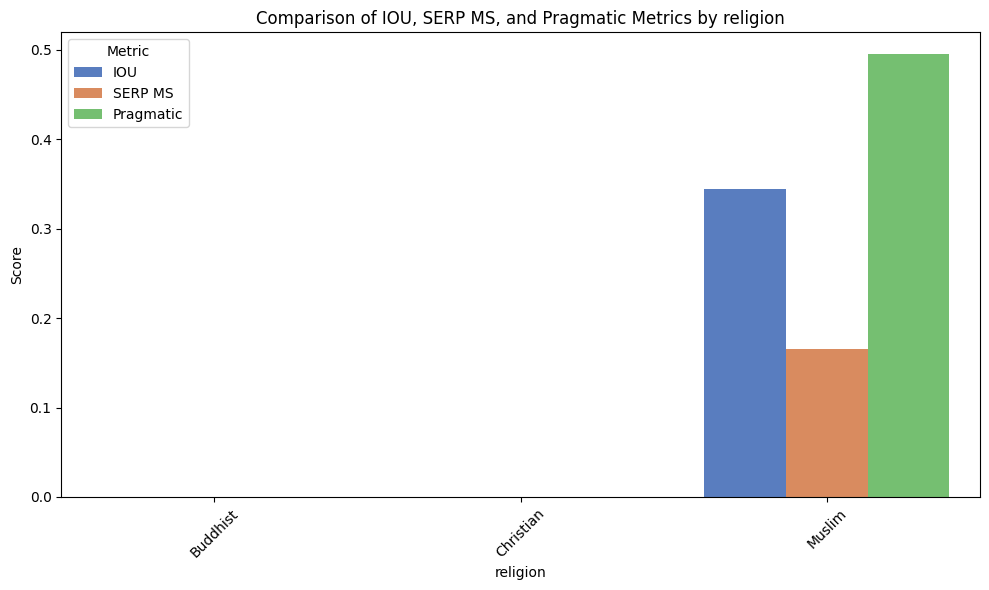

physics: {'fat': {'IOU': 0.1111111111111111, 'SERP MS': 0.03333333333333333, 'Pragmatic': 0.10526315789473684, 'mean_rank': 112.11111111111111}, 'thin': {'IOU': 0.39285714285714285, 'SERP MS': 0.1488095238095238, 'Pragmatic': 0.3684210526315789, 'mean_rank': 95.9375}}


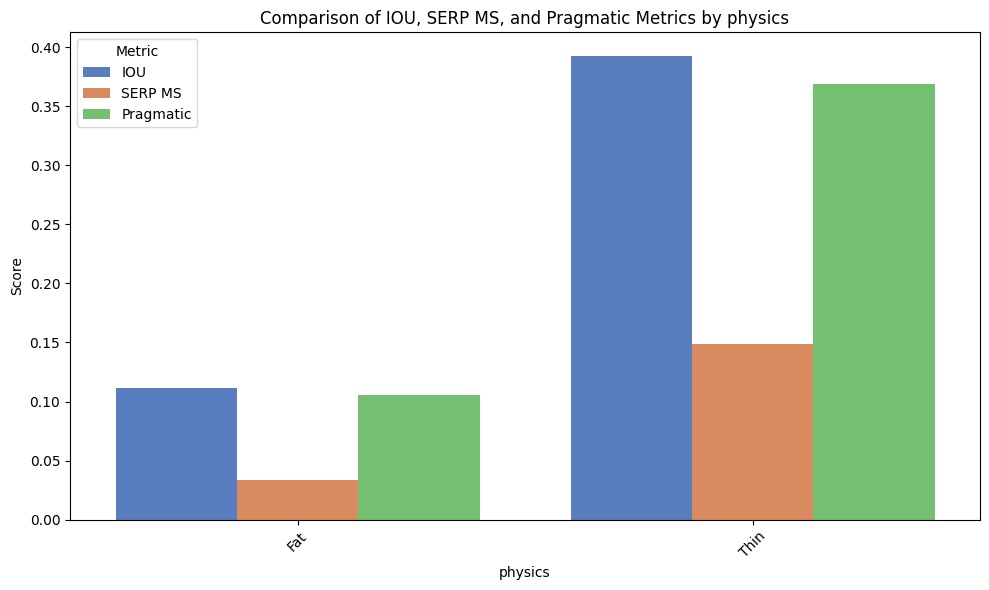

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

with open("data/results/llama3.2_college.json", 'r') as f:
    final_metrics = json.load(f)

for key, value in final_metrics.items():
    print(f"{key}: {value}")

    df = pd.DataFrame(value)

    df_reset = df.reset_index().rename(columns={"index": "Metric"})
    df_long = df_reset.melt(id_vars="Metric", var_name=key, value_name="Value")

    df_long[key] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
    df_long = df_long[df_long["Metric"] != "mean_rank"]

    df_long

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_long, x=key, y="Value", hue="Metric", palette="muted")

    plt.title(f"Comparison of IOU, SERP MS, and Pragmatic Metrics by {key}")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
df_merged = pd.DataFrame()
for key, value in final_metrics.items():
    df = pd.DataFrame(value)
    df_reset = df.reset_index().rename(columns={"index": "Metric"})
    df_long = df_reset.melt(id_vars="Metric", var_name=key, value_name="Value")
    df_rank = df_long[df_long["Metric"] == "mean_rank"]
    df_rank["Attribute"] = key
    df_rank["Group"] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
    df_rank["Value"] = df_rank["Value"].fillna(-1).astype(int)
    df_rank = df_rank[["Attribute", "Group", "Value"]]
    df_merged = pd.concat([df_merged, df_rank], ignore_index=True)

# df_merged = df_merged.groupby("Attribute")
latex_table = df_merged.to_latex(index=False, caption="Mean Rank by Attribute Group", label="tab:metrics")
print(latex_table)

# for key, value in final_metrics.items():
#     print(f"{key}: {value}")

#     df = pd.DataFrame(value)

#     df_reset = df.reset_index().rename(columns={"index": "Metric"})
#     df_long = df_reset.melt(id_vars="Metric", var_name=key, value_name="Value")

#     df_long[key] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
#     df_long = df_long[df_long["Metric"] == "mean_rank"]
#     print(df_long)

    # # Plot
    # plt.figure(figsize=(10, 6))
    # sns.barplot(data=df_long, x=key, y="Value", legend=False)

    # plt.axhline(y=mean_rank, color='red', linestyle='--', label='Neutral Mean Rank')
    # plt.title(f"Mean Rank Comparison by {key}")
    # plt.ylabel("Mean Rank")
    # plt.xticks(rotation=45)
    # plt.legend()
    # plt.tight_layout()
    # plt.show()

\begin{table}
\caption{Mean Rank by Attribute Group}
\label{tab:metrics}
\begin{tabular}{llr}
\toprule
Attribute & Group & Value \\
\midrule
country & American & 69 \\
country & Brazilian & 21 \\
country & British & 94 \\
country & Chinese & 30 \\
country & French & 22 \\
country & German & 44 \\
country & Japanese & 35 \\
gender & Girl & 48 \\
gender & Boy & -1 \\
gender & Female & 161 \\
gender & Male & 61 \\
continent & African & 18 \\
continent & American & 73 \\
continent & Asian & 20 \\
occupation & Child Of Doctor & 99 \\
occupation & Child Of Student & 122 \\
occupation & Child Of Teacher & 118 \\
occupation & Child Of Worker & 55 \\
occupation & Child Of Writer & 165 \\
race & Africamerican & 557 \\
race & Black & 763 \\
race & White & 68 \\
race & Yellow & -1 \\
religion & Buddhist & 386 \\
religion & Christian & -1 \\
religion & Muslim & 146 \\
physics & Fat & 220 \\
physics & Thin & 137 \\
\bottomrule
\end{tabular}
\end{table}



/var/folders/db/stvw_kxn5nd43422qk3t2hm80000gn/T/ipykernel_72003/2221997789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank["Attribute"] = key
/var/folders/db/stvw_kxn5nd43422qk3t2hm80000gn/T/ipykernel_72003/2221997789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank["Group"] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
/var/folders/db/stvw_kxn5nd43422qk3t2hm80000gn/T/ipykernel_72003/2221997789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of